In [12]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

spy_ticker = yf.Ticker('SPY')
df = yf.download('SPY',start="2022-01-01", end="2023-08-17")

[*********************100%***********************]  1 of 1 completed


In [13]:


def get_ci(high, low, close, lookback):
    tr1 = pd.DataFrame(high - low).rename(columns = {0:'tr1'})
    tr2 = pd.DataFrame(abs(high - close.shift(1))).rename(columns = {0:'tr2'})
    tr3 = pd.DataFrame(abs(low - close.shift(1))).rename(columns = {0:'tr3'})
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').dropna().max(axis = 1)
    atr = tr.rolling(1).mean()
    highh = high.rolling(lookback).max()
    lowl = low.rolling(lookback).min()
    ci = 100 * np.log10((atr.rolling(lookback).sum()) / (highh - lowl)) / np.log10(lookback)
    return ci

df['ci_14'] = get_ci(df['High'], df['Low'], df['Close'], 14)
spy = df.dropna()
print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  476.299988  477.850006  473.850006  477.709991  466.563324   
2022-01-04  479.220001  479.980011  475.579987  477.549988  466.407074   
2022-01-05  477.160004  477.980011  468.279999  468.380005  457.451050   
2022-01-06  467.890015  470.820007  465.429993  467.940002  457.021271   
2022-01-07  467.950012  469.200012  464.649994  466.089996  455.214478   
...                ...         ...         ...         ...         ...   
2023-08-10  448.190002  451.700012  444.700012  445.910004  445.910004   
2023-08-11  443.970001  446.700012  443.350006  445.649994  445.649994   
2023-08-14  444.700012  448.109985  444.380005  448.109985  448.109985   
2023-08-15  446.269989  446.640015  442.299988  442.890015  442.890015   
2023-08-16  442.459991  444.179993  439.529999  439.640015  439.640015   

               Volume      ci_14  
Da

In [14]:
import talib

rsi = talib.RSI(df["Close"])
data = df

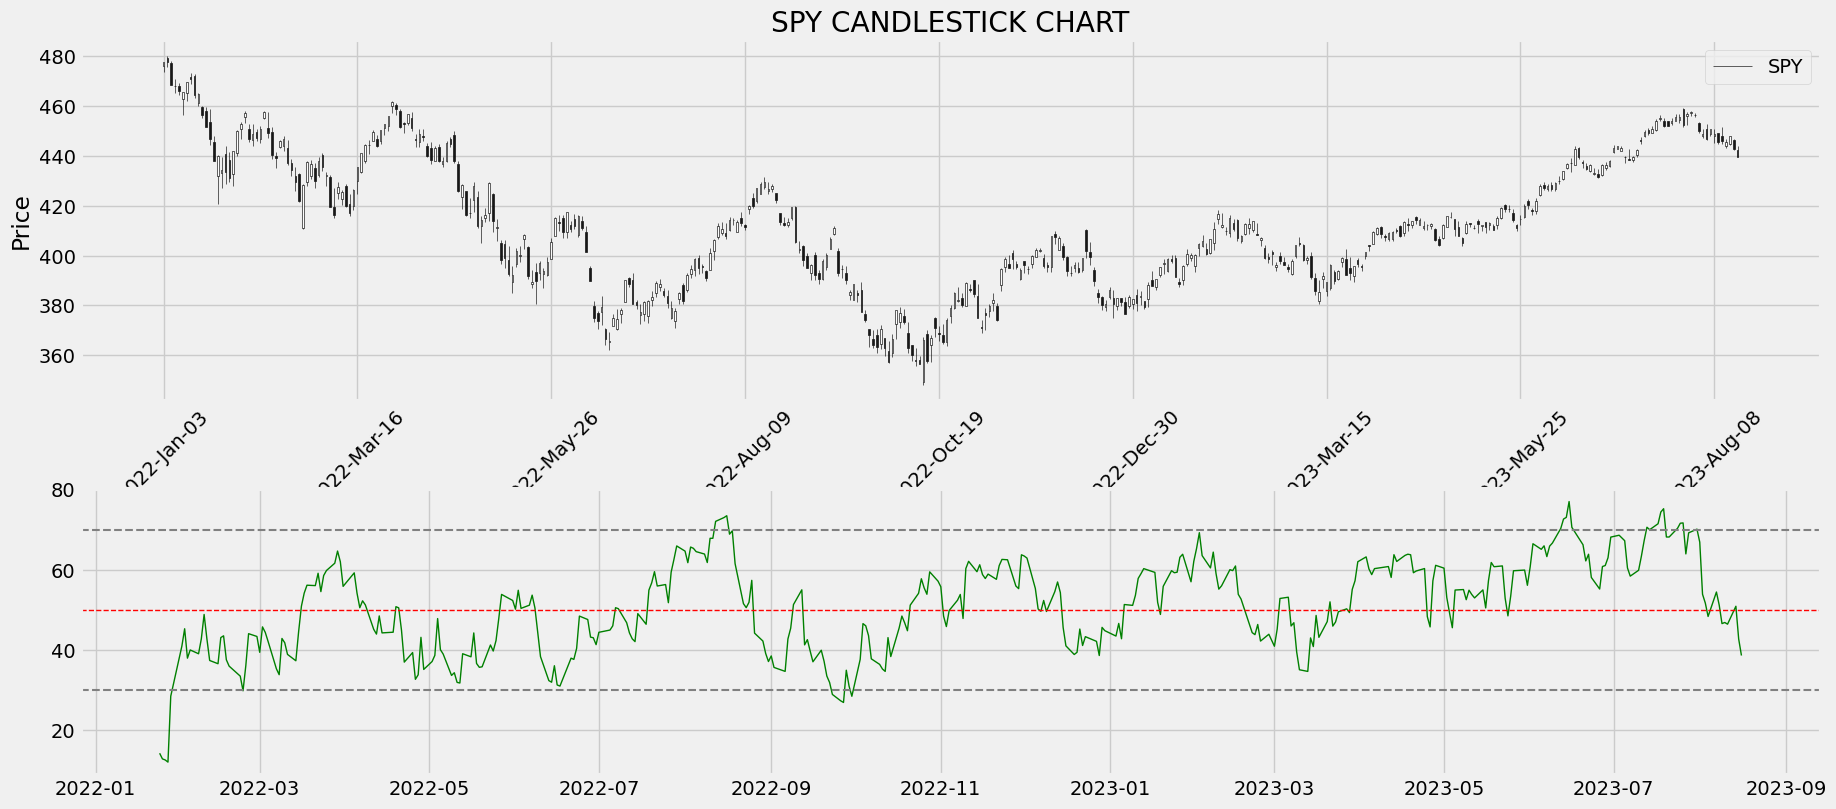

In [15]:
import mplfinance as mpf

# Create a new figure and set the size
fig = plt.figure(figsize=(20, 10))

# Create the first subplot for the candlestick chart
ax1 = plt.subplot2grid((11, 1), (0, 0), rowspan=5, colspan=1)

# Plot the candlestick chart
mpf.plot(df, type='candle', ax=ax1)

# Set the title for the first subplot
ax1.set_title('SPY CANDLESTICK CHART')

# Create the second subplot for the choppiness index
ax2 = plt.subplot2grid((11, 1), (6, 0), rowspan=4, colspan=1)

# Plot the choppiness index
ax2.plot(rsi, color = 'green', linewidth = 1.0)
#ax2.plot(df['ci_14'], linewidth=2.5, color='#fb8c00')
ax2.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(50, linestyle='--', linewidth=1.0, color='red')
#ax2.set_title('SPY CHOPPINESS INDEX 14')

# Add legends to the subplots
ax1.legend(['SPY'])


# Show the plot
plt.show()

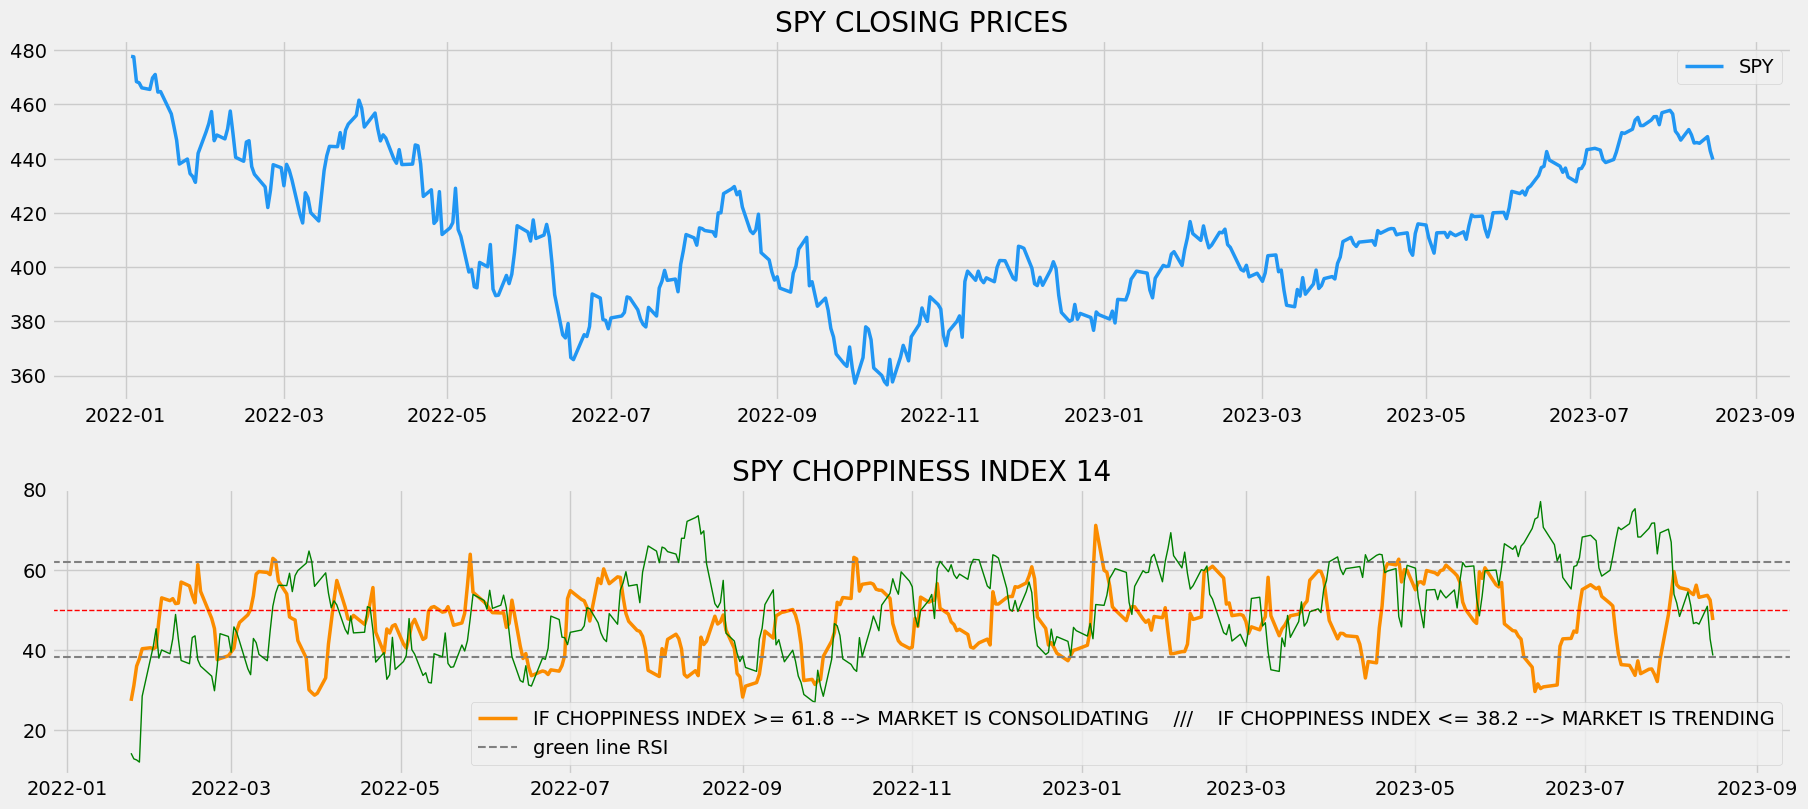

In [16]:


ax1 = plt.subplot2grid((11,1,), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1,), (6,0), rowspan = 4, colspan = 1)

ax1.plot(df['Close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('SPY CLOSING PRICES')
ax2.plot(df['ci_14'], linewidth = 2.5, color = '#fb8c00')
ax2.axhline(38.2, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(61.8, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(50, linestyle = '--', linewidth = 1.0, color = 'red')
ax2.set_title('SPY CHOPPINESS INDEX 14')
ax1.legend(['SPY'])
ax2.legend(['IF CHOPPINESS INDEX >= 61.8 --> MARKET IS CONSOLIDATING    ///    IF CHOPPINESS INDEX <= 38.2 --> MARKET IS TRENDING', 'green line RSI',])

ax2.plot(rsi, color = 'green', linewidth = 1.0)
plt.show()



